### Proyecto 2 Entrega 1
### Sebastian Garcia 22291
### Jose Morales 22689

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.diagnostic as smd
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge
import seaborn as sns
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from yellowbrick.regressor import ResidualsPlot
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
from scipy.stats import normaltest
from scipy.stats import linregress
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.decomposition import PCA
from sklearn.metrics import *
import sklearn.metrics as metrics
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.feature_selection import SequentialFeatureSelector 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.linear_model import RidgeCV, Ridge
from sklearn.linear_model import LassoCV,Lasso

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import LabelEncoder

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

from joblib import dump, load
from sklearn.metrics import mean_absolute_error, mean_squared_error

from sklearn.compose import make_column_selector as selector
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB

ModuleNotFoundError: No module named 'matplotlib'

# Leer datos de un csv #

In [2]:
archivo1_csv = "train.csv"
datost = pd.read_csv(archivo1_csv, encoding='ISO-8859-1')

# - Analisis Exploratorio #

# Resumen del set de datos #

In [3]:
datost.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
datost.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
datost.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

# Descripción de Columnas #

1. **Id**: Id con el que está identificada la casa. <br>
2. **MSSubClass**: Tipo de construcción de la propiedad (subclase). <br>
3. **MSZoning**: Zona de uso de la propiedad (residencial, comercial, etc.). <br>
4. **LotFrontage**: Longitud en pies de trozo de calle conectado a la propiedad. <br>
5. **LotArea**: Tamaño del lote en pies cuadrados. <br>
6. **Street**: Tipo de calle donde se encuentra la propiedad. <br>
7. **Alley**: Acceso a la propiedad desde una calle secundaria o callejón. <br>
8. **LotShape**: Forma general de la propiedad. <br>
9. **LandContour**: Planicidad de la propiedad (si es plana, en pendiente, etc.). <br>
10. **Utilities**: Tipo de utilidades disponibles para la propiedad (agua, electricidad, gas, etc.). <br>
11. **LotConfig**: Configuración del lote (si es esquina, interior, etc.). <br>
12. **LandSlope**: Pendiente del terreno (suave, moderado o empinado). <br>
13. **Neighborhood**: Localización de la propiedad en relación con las vecindades cercanas. <br>
14. **Condition1**: Proximidad a una calle principal o carretera. <br>
15. **Condition2**: Proximidad a una segunda calle o carretera si aplica. <br>
16. **BldgType**: Tipo de construcción de la vivienda (casa independiente, adosada, etc.). <br>
17. **HouseStyle**: Estilo arquitectónico de la vivienda. <br>
18. **OverallQual**: Calidad general de los materiales y productos terminados en la construcción. <br>
19. **OverallCond**: Calificación general de la condición del lugar (nuevo, bien mantenido, deteriorado, etc.). <br>
20. **YearBuilt**: Año de construcción de la casa. <br>
21. **YearRemodAdd**: Año en el que se hizo alguna remodelación significativa de la casa. <br>
22. **RoofStyle**: Tipo de techo de la propiedad. <br>
23. **RoofMatl**: Material utilizado en el techo de la vivienda. <br>
24. **Exterior1st**: Primer tipo de revestimiento exterior de la casa. <br>
25. **Exterior2nd**: Segundo tipo de revestimiento exterior si aplica. <br>
26. **MasVnrType**: Tipo de revestimiento de mampostería (piedra, ladrillo, etc.). <br>
27. **MasVnrArea**: Área del revestimiento de mampostería en pies cuadrados. <br>
28. **ExterQual**: Calidad del material exterior de la propiedad. <br>
29. **ExterCond**: Condición del material exterior de la propiedad. <br>
30. **Foundation**: Tipo de cimientos de la casa (ladrillo, hormigón, etc.). <br>
31. **BsmtQual**: Calidad del sótano (si es completo, tiene alta, media o baja calidad). <br>
32. **BsmtCond**: Condición general del sótano. <br>
33. **BsmtExposure**: Si las paredes del sótano están expuestas o a nivel de jardín o salida. <br>
34. **BsmtFinType1**: Calidad del área terminada del sótano. <br>
35. **BsmtFinSF1**: Pies cuadrados del área terminada del sótano. <br>
36. **BsmtFinType2**: Calidad de la segunda área terminada del sótano, si aplica. <br>
37. **BsmtFinSF2**: Pies cuadrados del área terminada de la segunda zona del sótano. <br>
38. **BsmtUnfSF**: Pies cuadrados del sótano sin terminar. <br>
39. **TotalBsmtSF**: Pies cuadrados totales del sótano. <br>
40. **Heating**: Tipo de calefacción de la casa. <br>
41. **HeatingQC**: Calidad y condición del sistema de calefacción. <br>
42. **CentralAir**: Si la propiedad cuenta con aire acondicionado central. <br>
43. **Electrical**: Tipo de sistema eléctrico de la vivienda. <br>
44. **1stFlrSF**: Pies cuadrados del primer piso de la casa. <br>
45. **2ndFlrSF**: Pies cuadrados del segundo piso de la casa. <br>
46. **LowQualFinSF**: Pies cuadrados con acabados de baja calidad en todos los pisos. <br>
47. **GrLivArea**: Pies cuadrados de superficie habitable sobre el nivel del suelo. <br>
48. **BsmtFullBath**: Número de baños completos en el sótano. <br>
49. **BsmtHalfBath**: Número de baños a medio terminar en el sótano. <br>
50. **FullBath**: Número de baños completos fuera del sótano. <br>
51. **HalfBath**: Número de baños a medio terminar fuera del sótano. <br>
52. **BedroomAbvGr**: Número de dormitorios fuera del sótano. <br>
53. **KitchenAbvGr**: Número de cocinas fuera del sótano. <br>
54. **KitchenQual**: Calidad de la cocina. <br>
55. **TotRmsAbvGrd**: Número total de habitaciones fuera del sótano. <br>
56. **Functional**: Calificación de la funcionalidad de la casa (por ejemplo, si la distribución es adecuada). <br>
57. **Fireplaces**: Número de chimeneas en la propiedad. <br>
58. **FireplaceQu**: Calidad de las chimeneas. <br>
59. **GarageType**: Ubicación del garaje (integrado, separado, etc.). <br>
60. **GarageYrBlt**: Año en el que fue construido el garaje. <br>
61. **GarageFinish**: Acabado interior del garaje. <br>
62. **GarageCars**: Número de coches que el garaje puede albergar. <br>
63. **GarageArea**: Tamaño del garaje en pies cuadrados. <br>
64. **GarageQual**: Calidad del garaje. <br>
65. **GarageCond**: Condición del garaje. <br>
66. **PavedDrive**: Si la propiedad tiene un camino pavimentado. <br>
67. **WoodDeckSF**: Área cubierta de madera en pies cuadrados. <br>
68. **OpenPorchSF**: Área del porche abierto en pies cuadrados. <br>
69. **EnclosedPorch**: Área cerrada del porche en pies cuadrados. <br>
70. **3SsnPorch**: Área del porche de tres estaciones. <br>
71. **ScreenPorch**: Área del porche con malla o red en pies cuadrados. <br>
72. **PoolArea**: Área de la piscina en pies cuadrados. <br>
73. **PoolQC**: Calidad de la piscina. <br>
74. **Fence**: Calidad de la cerca de la propiedad. <br>
75. **MiscFeature**: Características no cubiertas en otras categorías (por ejemplo, ascensor, terraza, etc.). <br>
76. **MiscVal**: Valor de las características adicionales no cubiertas en otras categorías. <br>
77. **MoSold**: Mes en el que se vendió la propiedad. <br>
78. **YrSold**: Año en el que se vendió la propiedad. <br>
79. **SaleType**: Tipo de venta de la propiedad (por ejemplo, venta normal, subasta, etc.). <br>
80. **SaleCondition**: Condición de la venta (por ejemplo, si fue una venta de remate o en condiciones especiales). <br>
81. **SalePrice**: Precio de venta de la casa. <br>


In [6]:
datost.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
datost.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
datost.duplicated().sum()

0

# Obtenemos las columnas con datos Numericos #

In [9]:
# Obtener los nombres de las columnas numericas
columnas_numericas = datost.select_dtypes(include=['number']).columns.tolist()
columnas_numericas.remove('Id')

# Obtener los nombres de las columnas no numéricas
columnas_no_numericas = datost.select_dtypes(exclude=['number']).columns.tolist()
print("Columnas numéricas:")
print(columnas_numericas)

print("\nColumnas no numéricas:")
print(columnas_no_numericas)


numericast = datost[columnas_numericas]
#numericasp = datosp[columnas_numericas]



Columnas numéricas:
['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

Columnas no numéricas:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu

# Obtenemos las columnas numericas con datos faltantes #

In [10]:
def count_empty_values_per_column(df):
    total_rows = len(df)
    missing_values = df.isna().sum()
    missing_values = missing_values[missing_values > 0]  # Filtrar solo columnas con valores faltantes
    
    if missing_values.empty:
        print("No hay valores faltantes en el DataFrame.")
    else:
        missing_percentage = (missing_values / total_rows) * 100
        missing_info = pd.DataFrame({
            'Valores Faltantes': missing_values,
            'Proporción (%)': missing_percentage
        })
        print("Número de valores faltantes por columna y su proporción respecto al total de filas:")
        print(missing_info)

#Columnas del df de train con filas vacias
count_empty_values_per_column(numericast)

Número de valores faltantes por columna y su proporción respecto al total de filas:
             Valores Faltantes  Proporción (%)
LotFrontage                259       17.739726
MasVnrArea                   8        0.547945
GarageYrBlt                 81        5.547945


In [11]:
#Columnas del df de test con filas vacias
#count_empty_values_per_column(numericasp)

Las variables que parecen podrian describir mejor el modelo son las variables GrLivArea y OverallQual por lo que se generaran modelos lineales con dichas variables

In [12]:
# Seleccionar las variables clave
columnas_numericas = ['SalePrice','MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd'
                      , 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 
                      'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath'
                      , 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt'
                      , 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch'
                      , '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

datos_numericos = datost[columnas_numericas]  # Crear nuevo dataframe con las variables seleccionadas

# Mostrar las primeras filas para verificar
datos_numericos.head()



,SalePrice,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,208500,60,65.0,8450,7,5,2003,2003,196.0,706,...,548,0,61,0,0,0,0,0,2,2008
1,181500,20,80.0,9600,6,8,1976,1976,0.0,978,...,460,298,0,0,0,0,0,0,5,2007
2,223500,60,68.0,11250,7,5,2001,2002,162.0,486,...,608,0,42,0,0,0,0,0,9,2008
3,140000,70,60.0,9550,7,5,1915,1970,0.0,216,...,642,0,35,272,0,0,0,0,2,2006
4,250000,60,84.0,14260,8,5,2000,2000,350.0,655,...,836,192,84,0,0,0,0,0,12,2008


In [13]:
columnas_no_numericas = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


letras = datost[columnas_no_numericas]
letras.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Vemos valores nulos o repetidos que tiene nuestro conjunto de datos y los sustituimos por la mediana.

In [14]:
print("Valores nulos por columna:")
print(datos_numericos.isnull().sum())

# Verificar valores duplicados
print("\nNúmero de filas duplicadas:")
print(datos_numericos.duplicated().sum())

# Reemplazar valores nulos con la mediana de cada columna
# Para columnas numéricas, sustituimos los valores nulos por la mediana
datos_numericos = datos_numericos.apply(lambda x: x.fillna(x.median()) if x.isnull().any() else x)

# Verificar nuevamente los valores nulos después de reemplazarlos
print("\nValores nulos después de reemplazar con la mediana:")
print(datos_numericos.isnull().sum())


Valores nulos por columna:
SalePrice          0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

Número de filas duplicadas:
0

Valores nulos después de reemplazar con la mediana:
SalePrice        0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
Over

In [15]:
print("Valores nulos por columna en datos categóricos:")
print(letras.isnull().sum())

# Reemplazar valores nulos con la moda (valor más frecuente)
letras = letras.apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().any() else x)

# Verificar nuevamente los valores nulos
print("\nValores nulos después de reemplazar con la moda:")
print(letras.isnull().sum())


Valores nulos por columna en datos categóricos:
MSZoning            0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinType2       38
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       690
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype:

In [16]:
# Verificar que ambas tablas tienen la misma cantidad de filas
print("\nFilas en datos numéricos:", len(datos_numericos))
print("Filas en datos categóricos:", len(letras))

columnas_usar = ["SalePrice","OverallQual" ,"GrLivArea","GarageCars"]
datos_usar = datost[columnas_usar]


# Unir ambos datasets
datos_limpiados = pd.concat([datos_usar, letras], axis=1)
datos_limpiados2 = datos_limpiados.copy()
datos_limpiados3 = datos_limpiados.copy()

# Mostrar el resultado final
print("\nDatos combinados después de la limpieza:")
print(datos_limpiados.head())



Filas en datos numéricos: 1460
Filas en datos categóricos: 1460

Datos combinados después de la limpieza:
   SalePrice  OverallQual  GrLivArea  GarageCars MSZoning Street Alley  \
0     208500            7       1710           2       RL   Pave  Grvl   
1     181500            6       1262           2       RL   Pave  Grvl   
2     223500            7       1786           2       RL   Pave  Grvl   
3     140000            7       1717           3       RL   Pave  Grvl   
4     250000            8       2198           3       RL   Pave  Grvl   

  LotShape LandContour Utilities  ... GarageType GarageFinish GarageQual  \
0      Reg         Lvl    AllPub  ...     Attchd          RFn         TA   
1      Reg         Lvl    AllPub  ...     Attchd          RFn         TA   
2      IR1         Lvl    AllPub  ...     Attchd          RFn         TA   
3      IR1         Lvl    AllPub  ...     Detchd          Unf         TA   
4      IR1         Lvl    AllPub  ...     Attchd          RFn       

In [17]:
datos_limpiados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   GarageCars     1460 non-null   int64 
 4   MSZoning       1460 non-null   object
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

*Preprocesamiento del dataset*

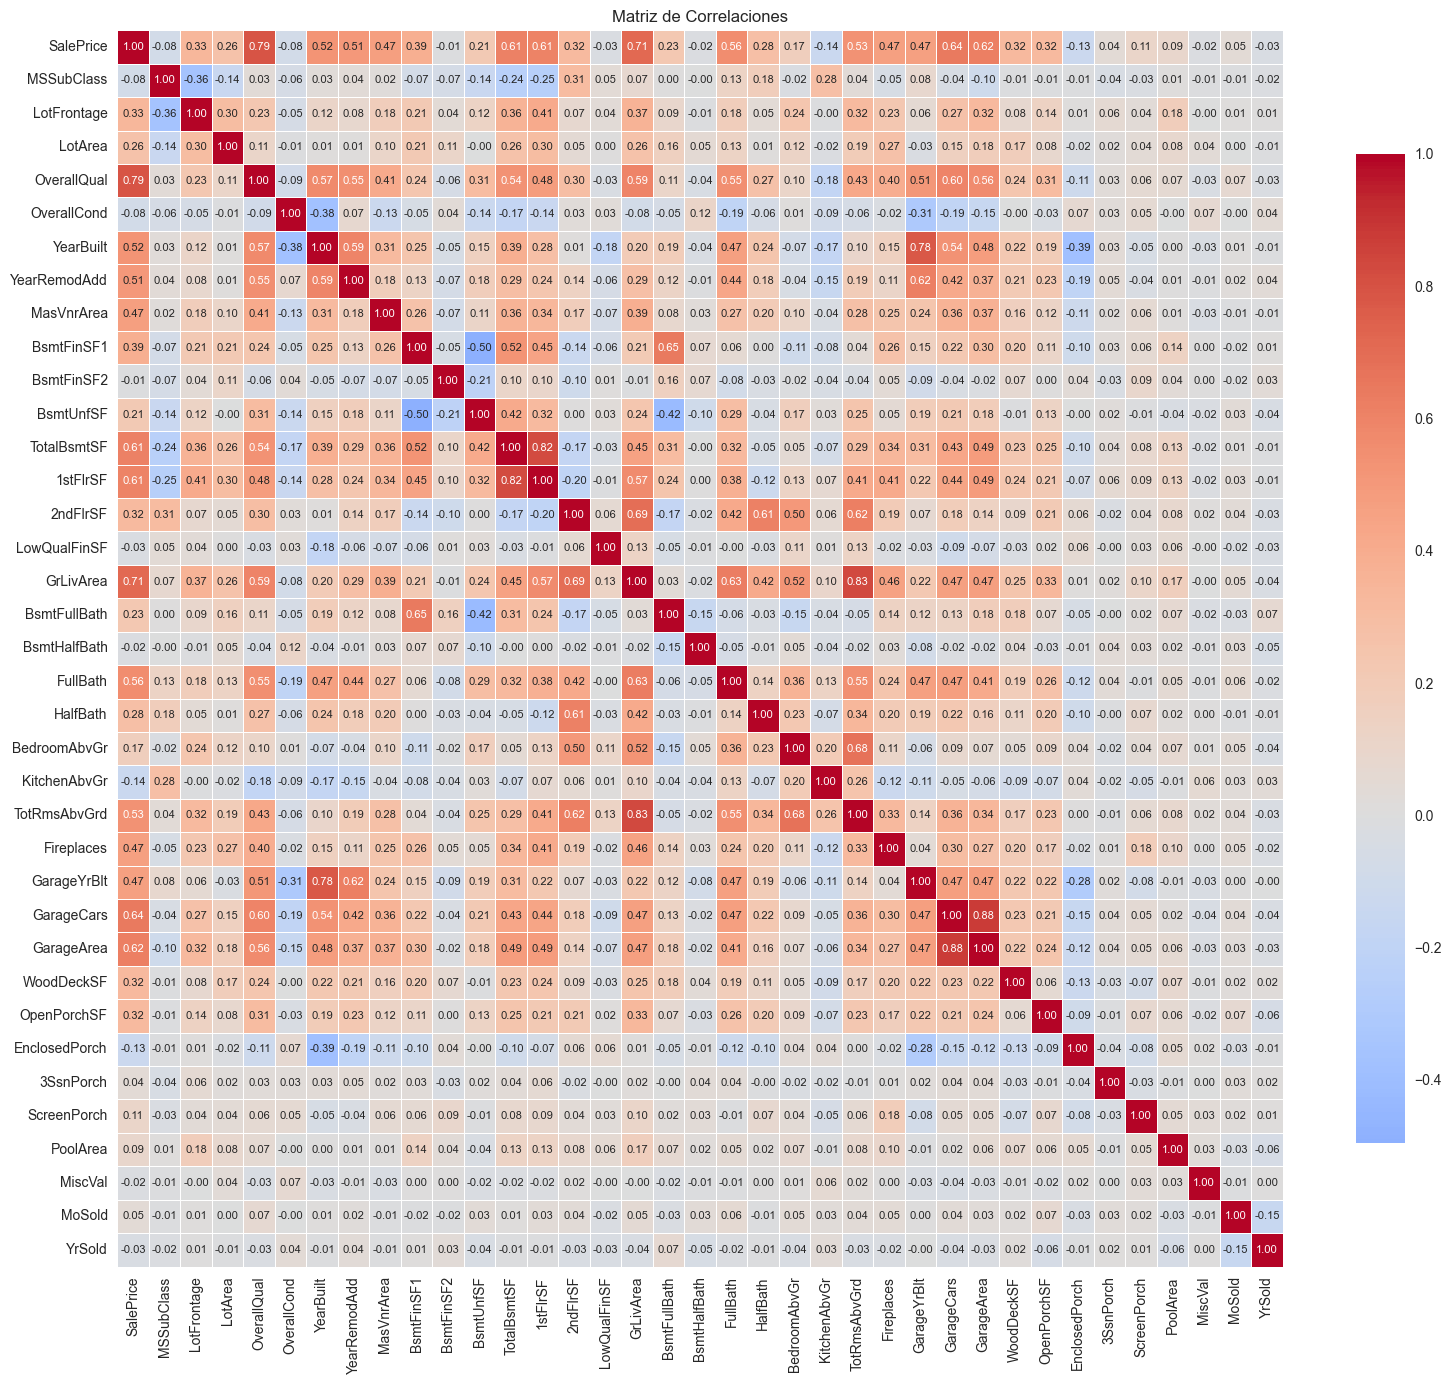

In [18]:
X = datos_numericos[columnas_numericas]

# Calcular matriz de correlaciones
corr_matrix = X.corr()


# Ajustar el tamaño de la figura para que sea lo suficientemente grande
plt.figure(figsize=(16, 14))

# Crear el heatmap
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            cbar_kws={'shrink': 0.8},  # Reducir el tamaño de la barra de color
            annot_kws={'size': 8},  # Reducir el tamaño de la fuente de los números
            linewidths=0.5)

# Rotar las etiquetas para que sean legibles
plt.xticks(rotation=90)  # Rota las etiquetas del eje X
plt.yticks(rotation=0)   # Rota las etiquetas del eje Y (si es necesario)

# Agregar título
plt.title('Matriz de Correlaciones')

# Ajustar los márgenes para que no se corten las etiquetas
plt.tight_layout()

# Mostrar la matriz
plt.show()

# Normalización de las variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

<p>Observando la matriz de correlacíon podemos ver que hay varias columnas que no tienen una buena correlación con la variable SalePrice, la cual es la que nos interesa evaluar para los futuros modelos, por lo tanto solamente trabajaremos con: </p>

SalePrice,OverallQual ,GrLivArea,GarageCars


<p> Se puede observar que las columnas que vamos a utilizar no tienen valores nulos, por lo tanto no hay que corregir el dataframe. </p>

In [19]:
datos_limpiados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   GarageCars     1460 non-null   int64 
 4   MSZoning       1460 non-null   object
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

In [20]:
datos_limpiados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   OverallQual    1460 non-null   int64 
 2   GrLivArea      1460 non-null   int64 
 3   GarageCars     1460 non-null   int64 
 4   MSZoning       1460 non-null   object
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  RoofStyle      1460 non-null   object
 18  RoofMatl       1460 non-null

Variable respuesta

In [21]:
y = datos_limpiados2.pop('SalePrice')
X = datos_limpiados2

In [22]:
print(X)
print(X.columns)

      OverallQual  GrLivArea  GarageCars MSZoning Street Alley LotShape  \
0               7       1710           2       RL   Pave  Grvl      Reg   
1               6       1262           2       RL   Pave  Grvl      Reg   
2               7       1786           2       RL   Pave  Grvl      IR1   
3               7       1717           3       RL   Pave  Grvl      IR1   
4               8       2198           3       RL   Pave  Grvl      IR1   
...           ...        ...         ...      ...    ...   ...      ...   
1455            6       1647           2       RL   Pave  Grvl      Reg   
1456            6       2073           2       RL   Pave  Grvl      Reg   
1457            7       2340           1       RL   Pave  Grvl      Reg   
1458            5       1078           1       RL   Pave  Grvl      Reg   
1459            5       1256           1       RL   Pave  Grvl      Reg   

     LandContour Utilities LotConfig  ... GarageType GarageFinish GarageQual  \
0            Lvl   

In [31]:
X_train, X_test,y_train, y_test = train_test_split(X, y,test_size=0.3,train_size=0.7,random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1021, 46)
(438, 46)
(1021,)
(438,)


In [32]:
numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(datos_limpiados2)
categorical_columns = categorical_columns_selector(datos_limpiados2)
print(categorical_columns)
print(numerical_columns)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['OverallQual', 'GrLivArea', 'GarageCars']


In [33]:
categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standar-scaler', numerical_preprocessor,numerical_columns)
    ])
    

In [34]:
#param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',GaussianNB())])
#params = [{
#    "regressor__max_depth": np.arange(2, 10, 1)
#}]
pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('one-hot-encoder',
                                    OneHotEncoder(handle_unknown='ignore'),
                                    ['MSZoning', 'Street', 'Alley', 'LotShape',
                                     'LandContour', 'Utilities', 'LotConfig',
                                     'LandSlope', 'Neighborhood', 'Condition1',
                                     'Condition2', 'BldgType', 'HouseStyle',
                                     'RoofStyle', 'RoofMatl', 'Exterior1st',
                                     'Exterior2nd', 'MasVnrType', 'ExterQual',
                                     'ExterCond', 'Foundation', 'BsmtQual',
                                     'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                                     'BsmtFinType2', 'Heating', 'HeatingQC',
                                     'CentralAir', 'Electrical', ...]),
                                   ('standar-sc

In [ ]:
modelo = pipeline.fit(X_train,y_train)
y_pred = modelo.predict(X_test)
rmse = root_mean_squared_error(y_test,y_pred)
rmse

TypeError: __init__() got an unexpected keyword argument 'sparse'

In [ ]:
params =  [{
    "regressor__var_smoothing": np.logspace(0,-9, num=100)
}]
modelo = GridSearchCV(pipeline,param_grid=params,n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo.fit(X_train,y_train)
modelo.best_params_

1.6.1


In [ ]:
print(modelo.best_estimator_)
print('best score:')
print(modelo.best_score_)
y_mejor_pred = modelo.best_estimator_.predict(X_test)

In [ ]:
rmse_tunned = root_mean_squared_error(y_test,y_mejor_pred)
rmse_tunned

In [ ]:
# Calcula la diferencia entre las predicciones y los valores reales
differences = y_pred - y_test

# Crear un gráfico de dispersión entre las predicciones y los valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=differences)
plt.axhline(0, color='red', linestyle='--')  # Línea horizontal en 0 para ver las diferencias
plt.xlabel('Valores Reales de city-mpg')
plt.ylabel('Diferencia (Predicción - Real)')
plt.title('Diferencia entre Predicción y Valor Real para city-mpg')
plt.show()

In [ ]:
differences = y_pred - y_test

# Graficar la distribución de las diferencias
plt.figure(figsize=(8, 6))
sns.histplot(differences, kde=True)
plt.axvline(0, color='red', linestyle='--')  # Línea en 0 para ver la tendencia
plt.xlabel('Diferencia (Predicción - Real)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Diferencia entre Predicción y Valor Real')
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')